In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras as ks

#editando a figura plotada

In [ ]:
plt.style.use ('dark_background')
plt.rcParams['figure.figsize'] = (10,10)

#Criando dataSet

In [ ]:
def get_linear_curve(x, w, b=0, noise_scale = 0):
  return w*x + b + noise_scale*np.random.randn(x.shape[0])    #determinando curva. adição de ruido de tamanho igual ao vetor x.  noise_scale=escala de ruido.

In [ ]:
x = np.arange(-20, 40.1, 0.000001)
Y = get_linear_curve(x, 1.8, 32, noise_scale = 2.5)

#*tamanho* da curva e impresão

In [ ]:
x.shape,Y.shape

((60100001,), (60100001,))

Text(0, 0.5, '°F')

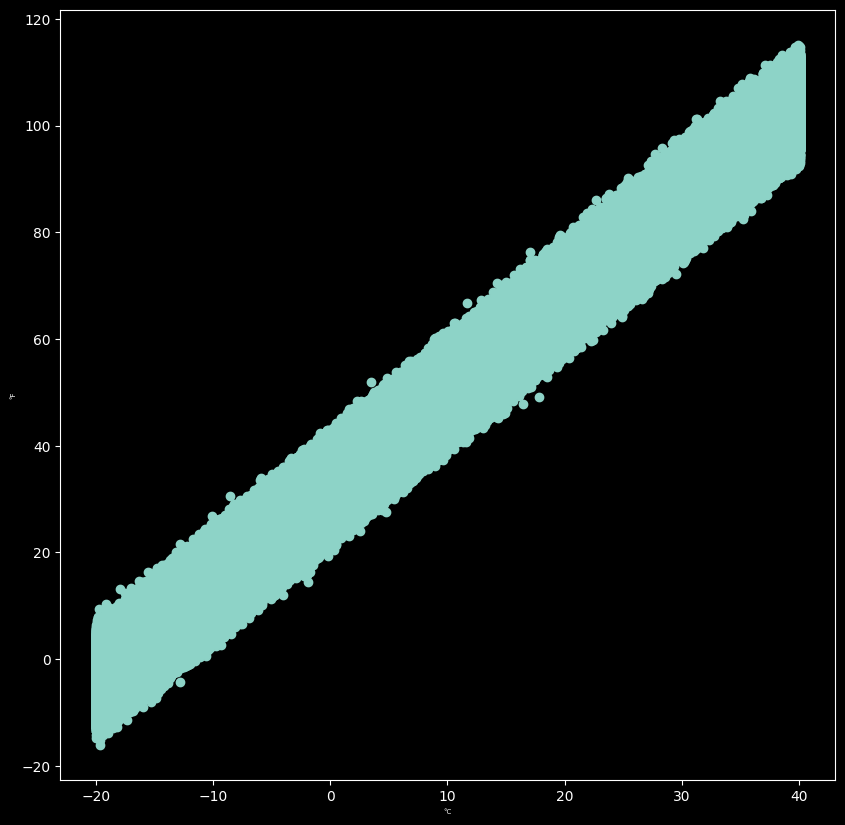

In [ ]:
plt.scatter(x,Y)
plt.xlabel('°C',fontsize=5)
plt.ylabel('°F',fontsize=5)

#adicionando Ruido no dataseet

-randn é a distribuição normal; plt.hist--> imprimir histograma. edgecolor troca a cor da linha de divisão do histograma

-bins divide o intervalo.

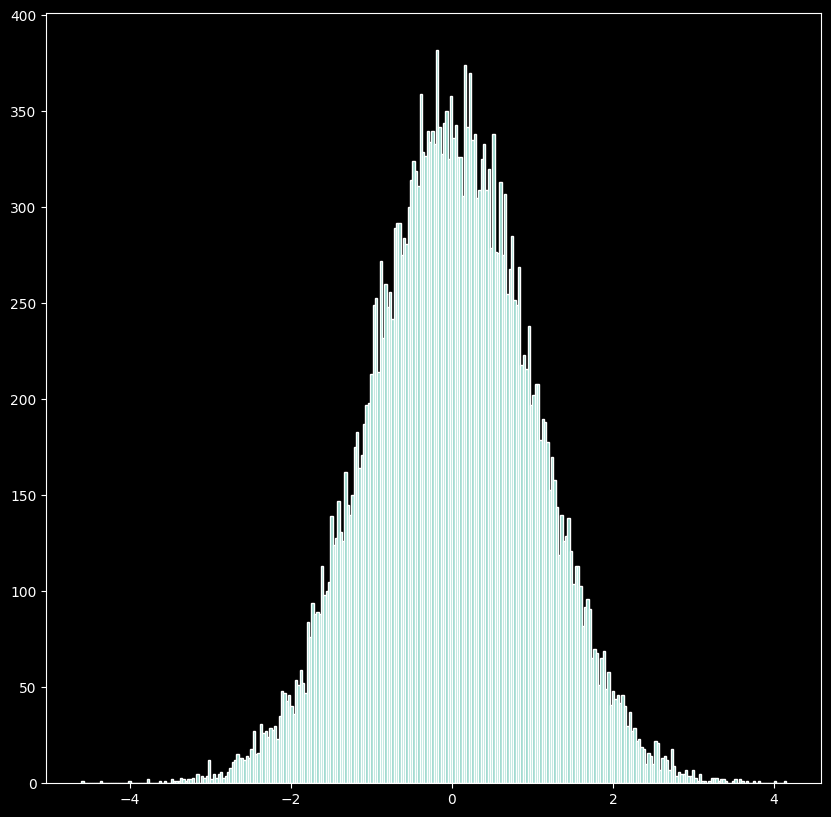

In [ ]:
plt.hist(np.random.randn(30000), bins = 300, edgecolor ="white");

# Modelo aplicado
-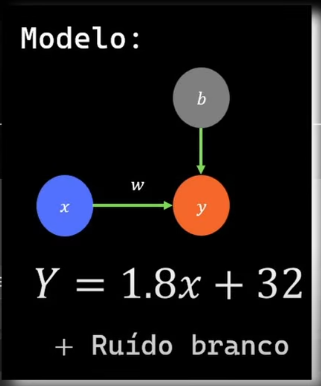

-uma entrada
- uma saida
-um peso
-um bainse
-sem função de ativação
-sem rendeleyar(camada escondida)
#etapas
-iniciar pesos e bias
-feedforward
-calcular perda
-backpropagation.

#dw=
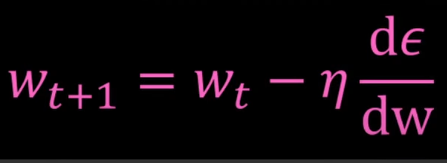

In [ ]:
w = np.random.rand(1)
b = 0

In [ ]:
def feedForward(entradas, w , b):
  return w*entradas + b

In [ ]:
def mse(Y,y):
  return (Y-y)**2  #função de perda

In [ ]:
def BackPropagation(entradas, saidas, valor_real, w, b, taxa_de_aprendizagem):
    #derivadas#
    dw = taxa_de_aprendizagem*(-2*entradas*(valor_real-saidas)).mean()
    db = taxa_de_aprendizagem*(-2*(valor_real-saidas)).mean()
    #atualização dos pesos#
    w-=dw
    b-=db
    return w,b

In [ ]:
def model_fit(entradas, valores_reais, w, b, epochs = 500, taxa_de_aprendizagem = 0.00001):
  for epochs in range(epochs):
    saidas = feedForward(entradas, w, b)
    loss = np.mean(mse(saidas, valores_reais))
    w, b = BackPropagation(entradas, saidas, valores_reais, w, b, taxa_de_aprendizagem)
    if (epochs+1)% 50 == 0:
      print(f'Epoch: [{(epochs+1)}/{epochs}] Loss: [{loss:4f}]')
  return w,b

In [ ]:
#inicialização
w = np.random.randn(1)
b = np.zeros(1)

In [ ]:
w, b = model_fit(x, Y, w, b, epochs = 500, taxa_de_aprendizagem = 0.005) # Changed X to x
print (f'w:{w[0]:.3f}, b:{b[0]:.3f}') # Changed [0] to b[0]

Epoch: [50/49] Loss: [74908613716911345278969869221659922157918591385600.000000]


KeyboardInterrupt: 

In [ ]:
plt.scatter(x,Y)
plt.plot(x, get_linear_curve(x,w,b),'r', lw=2)